# Shallow Neural Network in TensorFlow

Build a shallow neural network to classify handwritten digits

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/jonkrohn/DLTFpT/blob/master/notebooks/shallow_net_in_tensorflow.ipynb)

#### Load dependencies

In [1]:
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot as plt

#### Load data

In [2]:
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

11493376/11490434 [==============================] - 6s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
y_train[0:12]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5], dtype=uint8)

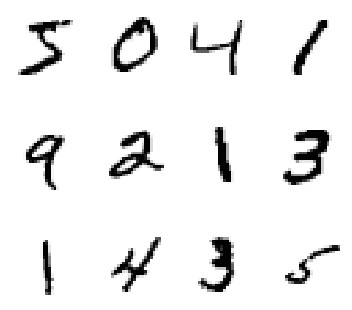

In [6]:
plt.figure(figsize=(5,5))
for k in range(12):
    plt.subplot(3, 4, k+1)
    plt.imshow(X_train[k], cmap='Greys')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [6]:
X_valid.shape

(10000, 28, 28)

In [7]:
y_valid.shape

(10000,)

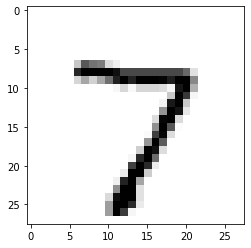

In [8]:
plt.imshow(X_valid[0], cmap='Greys')

In [10]:
X_valid[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [12]:
y_valid[0]

7

#### Preprocess data

In [13]:
X_train = X_train.reshape(60000, 784).astype('float32')
X_valid = X_valid.reshape(10000, 784).astype('float32')

In [14]:
X_train /= 255
X_valid /= 255

In [15]:
X_valid[0]

array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e

In [16]:
n_classes = 10
y_train = to_categorical(y_train, n_classes)
y_valid = to_categorical(y_valid, n_classes)

In [17]:
y_valid[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

#### Design neural network architecture

In [22]:
model = Sequential()
# hidden layer:
model.add(Dense(64, activation='sigmoid', input_shape=(784,)))

# output layer:
model.add(Dense(10, activation='softmax'))

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [24]:
(64*784)

50176

In [25]:
(64*784)+64

50240

In [26]:
(10*64)+10

650

#### Configure model

In [27]:
model.compile(loss='mean_squared_error', optimizer=SGD(lr=0.01), metrics=['accuracy'])

#### Train!

In [28]:
model.fit(X_train, y_train, batch_size=128, epochs=200, verbose=1, validation_data=(X_valid, y_valid))

Epoch 1/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0907 - accuracy: 0.1124 - val_loss: 0.0906 - val_accuracy: 0.1135
Epoch 2/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0905 - accuracy: 0.1124 - val_loss: 0.0904 - val_accuracy: 0.1135
Epoch 3/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0903 - accuracy: 0.1124 - val_loss: 0.0903 - val_accuracy: 0.1135
Epoch 4/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0902 - accuracy: 0.1124 - val_loss: 0.0902 - val_accuracy: 0.1135
Epoch 5/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0902 - accuracy: 0.1124 - val_loss: 0.0901 - val_accuracy: 0.1135
Epoch 6/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0901 - accuracy: 0.1124 - val_loss: 0.0901 - val_accuracy: 0.1135
Epoch 7/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0901 - accuracy: 0.1124 - val_loss: 0.0901 - val_accuracy: 0.1135

Epoch 58/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0900 - accuracy: 0.1124 - val_loss: 0.0900 - val_accuracy: 0.1135
Epoch 59/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0900 - accuracy: 0.1124 - val_loss: 0.0900 - val_accuracy: 0.1135
Epoch 60/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0900 - accuracy: 0.1124 - val_loss: 0.0900 - val_accuracy: 0.1135
Epoch 61/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0900 - accuracy: 0.1124 - val_loss: 0.0900 - val_accuracy: 0.1135
Epoch 62/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0900 - accuracy: 0.1124 - val_loss: 0.0900 - val_accuracy: 0.1135
Epoch 63/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0900 - accuracy: 0.1124 - val_loss: 0.0900 - val_accuracy: 0.1135
Epoch 64/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0900 - accuracy: 0.1124 - val_loss: 0.0900 - val_accuracy:

Epoch 115/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0900 - accuracy: 0.1124 - val_loss: 0.0900 - val_accuracy: 0.1135
Epoch 116/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0900 - accuracy: 0.1124 - val_loss: 0.0900 - val_accuracy: 0.1135
Epoch 117/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0900 - accuracy: 0.1124 - val_loss: 0.0900 - val_accuracy: 0.1135
Epoch 118/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0900 - accuracy: 0.1124 - val_loss: 0.0900 - val_accuracy: 0.1135
Epoch 119/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0900 - accuracy: 0.1124 - val_loss: 0.0900 - val_accuracy: 0.1135
Epoch 120/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0900 - accuracy: 0.1124 - val_loss: 0.0900 - val_accuracy: 0.1135
Epoch 121/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0900 - accuracy: 0.1124 - val_loss: 0.0900 - val_ac

#### Evaluating model performance

In [29]:
model.evaluate(X_valid, y_valid)

313/313 [==============================] - 0s 910us/step - loss: 0.0900 - accuracy: 0.1135


[0.08996748924255371, 0.11349999904632568]

#### Performing inference

In [30]:
valid_0 = X_valid[0].reshape(1, 784)

In [31]:
model.predict(valid_0)

array([[0.0987244 , 0.11240412, 0.09924728, 0.10215834, 0.0973955 ,
        0.0904221 , 0.09866791, 0.10436121, 0.09748164, 0.09913749]],
      dtype=float32)

In [32]:
model.predict_classes(valid_0)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([1], dtype=int64)